### <span style="color:#45fba2">Importing Necessary Modules : -

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,confusion_matrix

#### Importing the Dataset

In [72]:
df=pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv',index_col=False)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [73]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Shape of the Dataset

In [74]:
df.shape

(768, 9)

#### Plotting the Correlation-Matrix

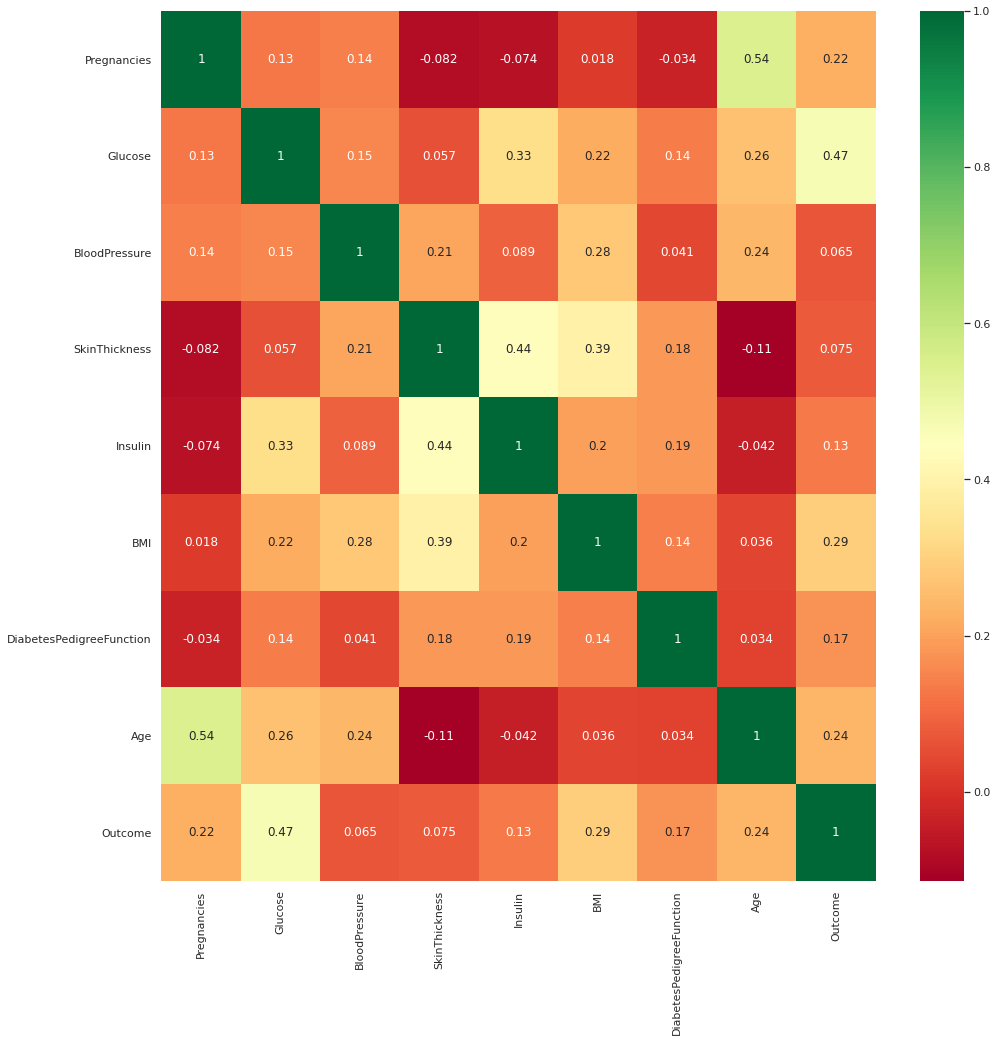

In [75]:
plt.figure(figsize=(16,16))
corm=df.corr()
top_cor_feature=corm.index
g=sns.heatmap(df[top_cor_feature].corr(),cmap='RdYlGn',annot=True)

<AxesSubplot:xlabel='Age', ylabel='Pregnancies'>

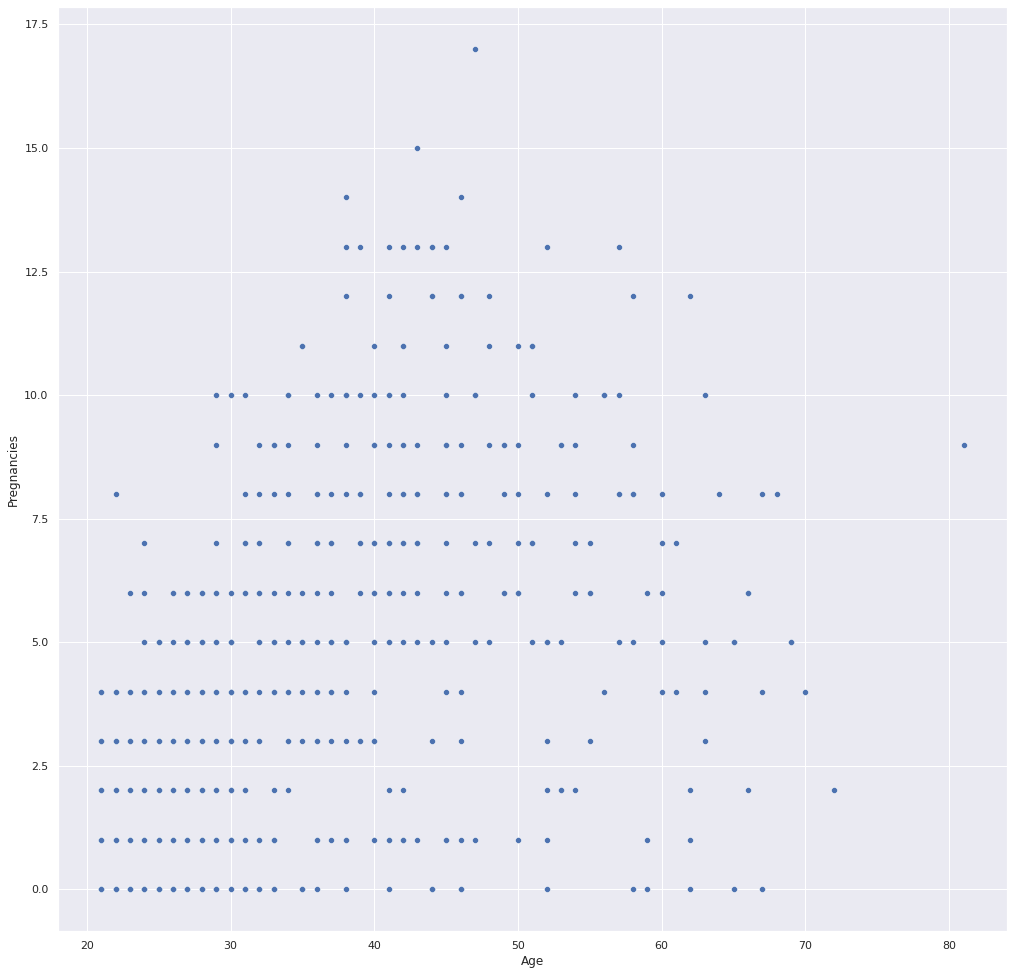

In [156]:
plt.figure(figsize=(17,17))

sns.scatterplot(data=df,x='Age',y='Pregnancies')

#### <span style="color:#fa2ab6">Divide the Data into inputs And Output

In [76]:
inputs=df.iloc[:,0:8]
output=df.iloc[:,8]


In [77]:
inputs

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [78]:
params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth" : [3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]
}

In [79]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [80]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [81]:
def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        print('Time Taken %i Hours %i Mintues %i Seconds.'%(thour,tmin,round(tsec,2)))
    

In [82]:
classifier=xgboost.XGBClassifier()

In [83]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',cv=5,verbose=0)



from datetime import datetime
start_time=timer(None)
random_search.fit(inputs,output)
timer(start_time)

[06:53:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:53:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:53:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:53:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [84]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [85]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None,eval_metric='mlogloss')


In [86]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,inputs,output,cv=10)

In [87]:
score

array([0.71428571, 0.79220779, 0.77922078, 0.68831169, 0.68831169,
       0.74025974, 0.76623377, 0.83116883, 0.73684211, 0.80263158])

#### Strtified K-Fold

In [140]:
from sklearn.model_selection import StratifiedKFold
acc=[]
skf=StratifiedKFold(n_splits=10,random_state=None)
skf.get_n_splits(inputs,output)
for train_index,test_index in skf.split(inputs,output):
    #print(train_index,' ',test_index)
    x_train,x_test=inputs.iloc[train_index],inputs.iloc[test_index]
    y_train,y_test=output.iloc[train_index],output.iloc[test_index]
    classifier.fit(x_train,y_train)
    pred=classifier.predict(x_test)
    score=accuracy_score(pred,y_test)
    acc.append(score)

    
#print(acc)

In [123]:
type(x_test)


pandas.core.frame.DataFrame

In [114]:
x_test.iloc[0]

Pregnancies                   3.000
Glucose                     130.000
BloodPressure                64.000
SkinThickness                 0.000
Insulin                       0.000
BMI                          23.100
DiabetesPedigreeFunction      0.314
Age                          22.000
Name: 686, dtype: float64

#### Mean of accuracy

In [160]:

test1=[[6,148,72,35,0,33,0.8,54]]
test2= pd.DataFrame(test1,columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'],dtype=float)
# type(test2)
p=classifier.predict(test2)
print("Diabetes [0 - No Yes - 1] :\n Result : ",p[0])

Diabetes [0 - No Yes - 1] :
 Result :  1


In [ ]:
np.array(acc).mean()

In [98]:
# stratified k-fold cross validation evaluation of xgboost model
from numpy import loadtxt
import xgboost
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
# load data
dataset =pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
# split data into X and y
X = dataset.iloc[:,0:8]
Y = dataset.iloc[:,8]

# CV model
model = xgboost.XGBClassifier()
kfold = StratifiedKFold(n_splits=10, random_state=None)
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
test1=[[6,148,72,35,0,33,0.8,54]]
row = asarray(test1)

model.predict(row)

[06:58:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:58:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:58:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:58:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

NotFittedError: need to call fit or load_model beforehand